In [1]:
! pip install datasets transformers seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.2 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=ce595b319f7fe7a64f342e40fa55e90f3e6feae66e551953d0235b1912c4ce6d
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5

In [4]:


import os
from google.colab import drive

drive.mount('/content/drive')

save_dir = '/content/drive/My Drive/Bert_model/ADE_Corpus_V2/model/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

model = AutoModelForTokenClassification.from_pretrained("/content/drive/My Drive/Bert_model/ADE_Corpus_V2/model/")
tokenizer = AutoTokenizer.from_pretrained("/content/drive/My Drive/Bert_model/ADE_Corpus_V2/model/")

nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer)

# Using the pipeline
labels = ["O", "B-AE", "I-AE"]
model.config.id2label = {i: label for i, label in enumerate(labels)}
model.config.label2id = {label: i for i, label in enumerate(labels)}


# text = "@USER_________ i found the humira to fix all my crohn's issues, but cause other issues. i went off it due to issues w nerves/muscle spasms"
text = "i found the humira to fix all my crohn's issues, but cause other issues. i went off it due to issues w nerves/muscle spasms"

entities = nlp_ner(text)
print(entities)


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


[{'entity': 'B-AE', 'score': 0.6657552, 'index': 10, 'word': 'cr', 'start': 33, 'end': 35}, {'entity': 'I-AE', 'score': 0.79992574, 'index': 11, 'word': '##oh', 'start': 35, 'end': 37}, {'entity': 'I-AE', 'score': 0.77034163, 'index': 12, 'word': '##n', 'start': 37, 'end': 38}, {'entity': 'I-AE', 'score': 0.79361117, 'index': 13, 'word': "'", 'start': 38, 'end': 39}, {'entity': 'I-AE', 'score': 0.7444222, 'index': 14, 'word': 's', 'start': 39, 'end': 40}, {'entity': 'I-AE', 'score': 0.55578154, 'index': 15, 'word': 'issues', 'start': 41, 'end': 47}, {'entity': 'B-AE', 'score': 0.52815396, 'index': 28, 'word': 'issues', 'start': 94, 'end': 100}, {'entity': 'I-AE', 'score': 0.7736897, 'index': 30, 'word': 'nerves', 'start': 103, 'end': 109}, {'entity': 'I-AE', 'score': 0.6055187, 'index': 31, 'word': '/', 'start': 109, 'end': 110}, {'entity': 'I-AE', 'score': 0.79455656, 'index': 32, 'word': 'muscle', 'start': 110, 'end': 116}, {'entity': 'I-AE', 'score': 0.96030194, 'index': 33, 'word':

In [9]:
# extract entity from pipeline output
def extract_effect(entity):
  effects = []
  current_effect = ''

  for item in entity:
      if item['entity'] in ['B-AE', 'I-AE']:
          if item['entity'] == 'B-AE':
              if current_effect:  # save previous effect if there's any
                  effects.append(current_effect.replace('##', ''))
              current_effect = item['word']
          elif item['entity'] == 'I-AE':
              current_effect += ' ' + item['word']

  if current_effect:  # save the last effect
      effects.append(current_effect.replace('##', ''))

  print("effect list",effects)
  return effects

In [10]:
# print(extract_effect(entities))

effect list ["cr oh n ' s issues", 'issues nerves / muscle spa sms']
["cr oh n ' s issues", 'issues nerves / muscle spa sms']


In [11]:
#import evaluation dataset from SMM4H
#import raw tweets data from dev
import pandas as pd

RawTweets_ColName = ['tweetid','tweettext']
RawTweets = pd.read_csv('https://raw.githubusercontent.com/FANMISUA/TweetAENormalization/main/ADENormalization/Dev/tweets.tsv',delimiter='\t',names=RawTweets_ColName)

SpansNorm_ColName = ['tweetid','ADE','start','end','adeterms','ptcode']

SpansNorm = pd.read_csv('https://raw.githubusercontent.com/FANMISUA/TweetAENormalization/main/ADENormalization/Dev/spans_norm.tsv',delimiter='\t',names=SpansNorm_ColName)


In [130]:
import re
def preprocessTweet1(tweet):
    # process the tweets
    tweet=tweet.replace('/', ' ')
    # Remove 'RT' from tweet
    tweet = re.sub(r'RT[\s]+', '', tweet)
    # Remove & (ampersand)
    tweet = re.sub(r'&', 'and', tweet)
    #Convert www.* or https?://* to URL to remove
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #Convert @username to @USER to remove
    tweet = re.sub('@[^\s]+','',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    # Remove all emojis.
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    tweet = emoji_pattern.sub(r'', tweet)

    # Remove redundant spaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()

    #remove unknown characters
    tweet = ''.join([c for c in tweet if ord(c) < 128])

    #trim
    tweet = tweet.strip('\'"')

    return(tweet)




In [16]:
#merge tweet text and tweet label data to consolidated_dataset
consolidated_dataset = {}

for id, text in RawTweets.values:
  # print(id,text)
  for SpanNorms in SpansNorm.loc[SpansNorm['tweetid'] == id].values:
    # print(text)
    # print(SpanNorms)
    if id in consolidated_dataset:
      # print("dup sentence!!!!")
      # print(SpanNorms)
      consolidated_dataset[id]['effect'].append(SpanNorms[4])
      consolidated_dataset[id]['effect_indices_start'].append(SpanNorms[2])
      consolidated_dataset[id]['effect_indices_end'].append(SpanNorms[3])
      consolidated_dataset[id]['ptcode'].append(SpanNorms[5])
      # print(consolidated_dataset[id]['effect'])
      # print("start",consolidated_dataset[id]['effect_indices_start'])
      # print("end",consolidated_dataset[id]['effect_indices_start'])
    else:
      consolidated_dataset[id] = {
          "id": id,
          "text": text,
          "effect_indices_start": [SpanNorms[2]],
          "effect_indices_end": [SpanNorms[3]],
          "effect":[SpanNorms[4]],
          "ptcode": [SpanNorms[5]]}


# print(consolidated_dataset)
# print(len(consolidated_dataset))

In [18]:
# consolidated_dataset

In [131]:
tweetDF = pd.DataFrame(list(consolidated_dataset.values()))
tweetDF.head()

,id,text,effect_indices_start,effect_indices_end,effect,ptcode
0,SMM4H2022ykI8vN7jZYnV57AM,@USER_________ i found the humira to fix all m...,"[119, 126]","[125, 139]","[nerves, muscle spasms]","[10029177, 10028334]"
1,SMM4H2022uCZV2SRsCe4vzjFm,@USER__________ have to go to a doc now to see...,"[61, 91]","[68, 110]","[gaining, gain like 50 pounds]","[10047896, 10047896]"
2,SMM4H20229Aha6m4XERqYdFWf,06.30 day 14 Rivaroxaban diary. Thanks to para...,[118],[134],[frontal headache],[10019211]
3,SMM4H2022UAvDTQWOIacvBkzp,rt @USER_______: my philly dr prescribed me tr...,"[76, 107, 117, 123]","[80, 115, 121, 129]","[sick, migraine, puke, shakes]","[10016365, 10027599, 10047700, 10040528]"
4,SMM4H2022qNHntuJnkevkahGr,ciprofloxacin: how do you expect to sleep when...,"[36, 52]","[41, 77]","[sleep, stomach is a cement mixer]","[10041017, 10042113]"


In [136]:
#clean the text
for index, item in tweetDF.iterrows():
    item['text'] = preprocessTweet1(item['text'])


In [155]:
#clean the tweets
tweetDF.head(100)

,id,text,effect_indices_start,effect_indices_end,effect,ptcode
0,SMM4H2022ykI8vN7jZYnV57AM,i found the humira to fix all my crohn's issue...,"[119, 126]","[125, 139]","[nerves, muscle spasms]","[10029177, 10028334]"
1,SMM4H2022uCZV2SRsCe4vzjFm,have to go to a doc now to see why i'm still g...,"[61, 91]","[68, 110]","[gaining, gain like 50 pounds]","[10047896, 10047896]"
2,SMM4H20229Aha6m4XERqYdFWf,06.30 day 14 Rivaroxaban diary. Thanks to para...,[118],[134],[frontal headache],[10019211]
3,SMM4H2022UAvDTQWOIacvBkzp,"rt my philly dr prescribed me trazodone,1pill ...","[76, 107, 117, 123]","[80, 115, 121, 129]","[sick, migraine, puke, shakes]","[10016365, 10027599, 10047700, 10040528]"
4,SMM4H2022qNHntuJnkevkahGr,ciprofloxacin: how do you expect to sleep when...,"[36, 52]","[41, 77]","[sleep, stomach is a cement mixer]","[10041017, 10042113]"
...,...,...,...,...,...,...
60,SMM4H2022cjwbGQbnkpVjjJzR,"Fucking Vyvanse, giving me cotton mouth. UGH.",[27],[39],[cotton mouth],[10013781]
61,SMM4H2022lX1A8RVuySkDzAB2,between the fucking redbull and vyvanse i popp...,[84],[104],[couldn't fall asleep],[10044698]
62,SMM4H2022qZC2BPG2BW7UC175,"rt vyvanse, commonly known as ocd in a pill.",[45],[48],[OCD],[10029898]
63,SMM4H20226b5WyZPTAJ7qL3dE,rt when are you going to do true life: i am ad...,[63],[71],[addicted],[10012336]


No charts were generated by quickchart


In [168]:
merged_dataset = {}

for index, item in tweetDF.iterrows():
  # print(item['text'])
  # print(item['effect'])
  # print(index)
  merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}

# print(merged_dataset)


In [176]:
for index, item in tweetDF.iterrows():
  if index == 0:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['w nerves', 'muscle spasms']}
  elif index == 1:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['']}
  elif index == 2:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 3:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['migraine','puke','shake']}
  elif index == 4:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['sleep']}
  elif index == 5:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['']}
  elif index == 6:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['insulin blocker']}
  elif index == 7:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 8:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['ruined']}
  elif index == 9:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['']}
  elif index == 10:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 11:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['dizzy']}
  elif index == 12:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['asleep']}
  elif index == 13:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['coming off','hangover','flu symptoms,nausea']}
  elif index == 14:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 15:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 16:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 17:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 18:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 19:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['kicking','nosleep']}
  elif index == 20:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['']}
  elif index == 21:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 22:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 23:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 24:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['']}
  elif index == 25:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 26:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 27:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['massive weight gain']}
  elif index == 28:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 29:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['']}
  elif index == 30:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['molly','sweatin']}
  elif index == 31:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 32:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 33:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['']}
  elif index == 34:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 35:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 36:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 37:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['massive sleepies']}
  elif index == 38:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 39:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 40:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['sweating']}
  elif index == 41:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 42:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 43:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['cant sleep']}
  elif index == 44:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['']}
  elif index == 45:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['']}
  elif index == 46:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['tired','appetite']}
  elif index == 47:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 48:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 49:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['sleeping','knackered']}
  elif index == 50:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['drunk']}
  elif index == 51:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['intense back pain']}
  elif index == 52:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 53:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 54:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['']}
  elif index == 55:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 56:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 57:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 58:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 59:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 60:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 61:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 62:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}
  elif index == 63:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":['']}
  elif index == 64:
    merged_dataset[item['id']] = {
      "id": item['id'],
      "text": item['text'],
      "PredAE":item['effect']}


# merged_data


In [177]:
merged_dataset

{'SMM4H2022ykI8vN7jZYnV57AM': {'id': 'SMM4H2022ykI8vN7jZYnV57AM',
  'text': "i found the humira to fix all my crohn's issues, but cause other issues. i went off it due to issues w nerves muscle spasms",
  'PredAE': ['w nerves', 'muscle spasms']},
 'SMM4H2022uCZV2SRsCe4vzjFm': {'id': 'SMM4H2022uCZV2SRsCe4vzjFm',
  'text': "have to go to a doc now to see why i'm still gaining. stupid paxil made me gain like 50 pounds ?? and now i have to lose it",
  'PredAE': ['']},
 'SMM4H20229Aha6m4XERqYdFWf': {'id': 'SMM4H20229Aha6m4XERqYdFWf',
  'text': '06.30 day 14 Rivaroxaban diary. Thanks to paracetamol and hot water bottle I had 4 hrs continuous sleep. Woke uo with frontal headache, 1 2',
  'PredAE': ['frontal headache']},
 'SMM4H2022UAvDTQWOIacvBkzp': {'id': 'SMM4H2022UAvDTQWOIacvBkzp',
  'text': 'rt my philly dr prescribed me trazodone,1pill made me so fkn sick, couldnt move 2day.xtreme migraine, puke, shakes. any1else ',
  'PredAE': ['migraine', 'puke', 'shake']},
 'SMM4H2022qNHntuJnkevkahGr'

In [180]:
outputPredict = pd.DataFrame(list(merged_dataset.values()))
outputPredict.head()
from google.colab import drive
drive.mount('/content/drive')
# Write to Google Drive
file_path = "/content/drive/My Drive/Data/Dev/predictAETerms.csv"
outputPredict.to_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
#convert text into word BIO ner list
def label_sentence(text, label_subtext):
# Initialize the labels list with 'O' (Outside) for each word
  labels = ['O'] * len(text.split())
  # print(labels)
  # Label the subtexts
  if label_subtext  == ['']:
    return(labels)
  # print(label_subtext)
  for subtext in label_subtext:
    # print("subtext:",subtext)
    subtext_words = subtext.split()
    # print("subtext_words",subtext_words,len(subtext_words))
    if len(subtext_words) > 1:
      # print("long subtext_word:",subtext_words)
      # print(subtext_words[0])
      for i in range(len(text.split())):
        # print(i,"all words:",text.split()[i])
        # print(subtext_words[0])
        if subtext_words[0] == text.split()[i]:
          # print(i,subtext_words[0],text.split()[i])
          labels[i] = 'B-AE'
        for j in range(1,len(subtext_words)):
          for k in range(len(text.split())):
            if subtext_words[j] == text.split()[k]:
              labels[k] = 'I-AE'
    else:
      # print("shortlength:",subtext_words)
      for w in range(len(text.split())):
        # print(w,text.split()[w])
        if subtext_words[0] == text.split()[w]:
          labels[w] = 'I-AE'
  return(labels)
# Print the labels

In [116]:
#test the label_sentence function
text = "Apple is a tech company headquartered in Cupertino."
label_subtext = ["tech company", "in"]
label_sentence(text,label_subtext)

['O', 'O', 'O', 'B-AE', 'I-AE', 'O', 'I-AE', 'O']

In [201]:
# label_sentence(text,[''])

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

In [204]:
TrueLabel = []
PredLabel = []



In [205]:
# MergeTweetADExtract = pd.DataFrame
MergeTweetADExtract = pd.DataFrame(columns=['tweetid','text','True_AE','Pred_AE'])
# print(tweetDF)
for index, item in tweetDF.iterrows():
  # print(item['id'],item['text'],item['effect'])
  # print(item['text'])
  # print(item['effect'])
  # print(outputPredict['PredAE'][index])
  # print(item['text'])
  # print(item['effect'])
  # print(item['id'])
  # cleanTweet = preprocessTweet1(item['text'])
  # print(cleantweet)
  outputTrueBIO = label_sentence(item['text'],item['effect'])
  # print(outputTrueBIO)
  TrueLabel.append(outputTrueBIO)

  #generalte predict labels
  outputPredBIO = label_sentence(item['text'],outputPredict['PredAE'][index])
  # print(outputPredBIO)
  PredLabel.append(outputPredBIO)
  # break


In [214]:
print("true label:",TrueLabel)
print("pred label:",PredLabel)
print( len(TrueLabel),len(PredLabel))


true label: [['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-AE', 'B-AE', 'I-AE'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-AE', 'I-AE', 'I-AE', 'I-AE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-AE', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'I-AE', 'O', 'O', 'B-AE', 'I-AE', 'I-AE', 'I-AE', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-AE', 'I-AE', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'B-AE', 'I-AE', 'I-AE', 'I-AE', 'O', 'O', 'O', 'O', 'O', 'B-AE', 'I-AE', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-AE', 'I-AE', 'I-AE', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-AE', 'I-AE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

In [218]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, classification_report


# Sample data
#flat_y_pred
#flat_y_true
#flat the prediction result
flat_y_true = [item for sublist in TrueLabel for item in sublist]
flat_y_pred = [item for sublist in PredLabel for item in sublist]
label_list = ['O', 'B-AE', 'I-AE']
print("totoal number of labels in prediction:",len(flat_y_true))

report = classification_report(flat_y_true, flat_y_pred, output_dict=True)
report


totoal number of labels in prediction: 1114


{'B-AE': {'precision': 0.8620689655172413,
  'recall': 0.5555555555555556,
  'f1-score': 0.6756756756756757,
  'support': 45},
 'I-AE': {'precision': 0.8870967741935484,
  'recall': 0.5612244897959183,
  'f1-score': 0.6875,
  'support': 98},
 'O': {'precision': 0.9423264907135875,
  'recall': 0.9927909371781668,
  'f1-score': 0.966900702106319,
  'support': 971},
 'accuracy': 0.9371633752244165,
 'macro avg': {'precision': 0.8971640768081257,
  'recall': 0.7031903275098803,
  'f1-score': 0.7766921259273315,
  'support': 1114},
 'weighted avg': {'precision': 0.9342258615818106,
  'recall': 0.9371633752244165,
  'f1-score': 0.9305574390939326,
  'support': 1114}}

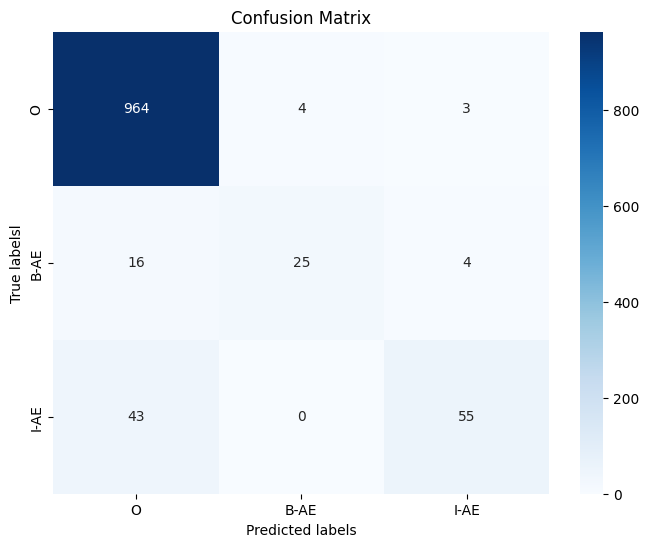

In [221]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(flat_y_true, flat_y_pred, labels = label_list)
# Compute classification report
report = classification_report(flat_y_true, flat_y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plotting
plt.figure(figsize=(8,6))

# Confusion matrix heatmap
# sns.heatmap(cm, annot=True, fmt='g', ax=ax[0], cmap='Blues')

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',xticklabels=label_list, yticklabels=label_list)
plt.ylabel('True labelsl')
plt.xlabel('Predicted labels')
plt.title('Confusion Matrix')
plt.show()


# # Bar chart for precision, recall, f1-score
# df_report[:-3].plot(kind='bar', y=['precision', 'recall', 'f1-score'], ax=ax[1])
# ax[1].set_title('Precision, Recall & F1 Score per Class')
# ax[1].set_ylabel('Score')
# ax[1].set_ylim([0, 1.1])
# plt.tight_layout()

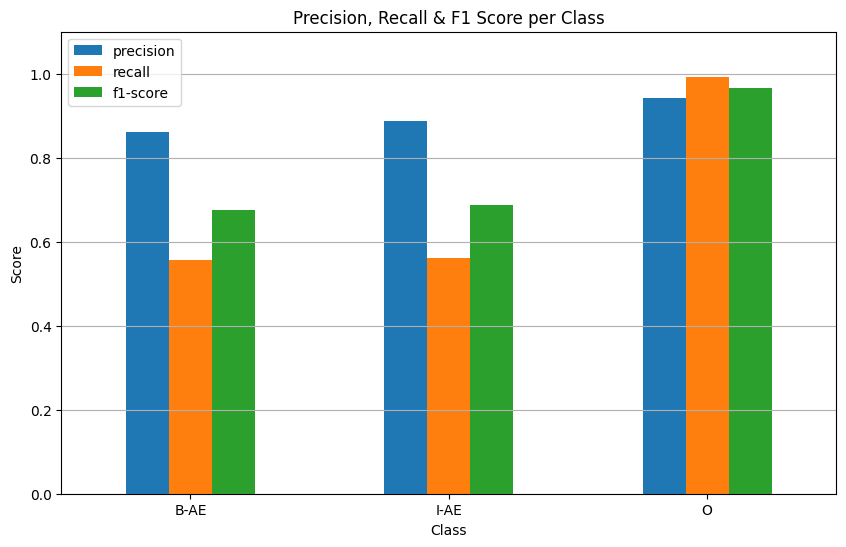

In [222]:
df_report = df_report[['precision', 'recall', 'f1-score']][:-3]

# Plot
df_report.plot(kind='bar', figsize=(10,6))
plt.title('Precision, Recall & F1 Score per Class')
plt.ylabel('Score')
plt.xlabel('Class')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()